In [6]:
import subprocess
from random_graph import random_matrix

def run_command(command):
    output = subprocess.run(command.split(" "), stdout=subprocess.PIPE, stderr=subprocess.PIPE, check=True) 
    return output.stdout.decode('utf-8')

In [7]:
list(range(3, 22, 2))

[3, 5, 7, 9, 11, 13, 15, 17, 19, 21]

In [43]:

results = {}
for number in range(3, 20, 2):
    results[number] = {
        "ga": {"time": [], "results": []},
        "exact": {"time": [], "results": []},
    }

    print()
    print(f"Running for {number} nodes")

    for i in range(20):
        if i % 5 == 0:
            print(f"Running {i} times")
            random_matrix(number)
        
        ga = run_command('./cmake-build-release/TSP_GA')
        exact = run_command('./cmake-build-release/ga_lib')

        ga_result, ga_time = ga.split("\n")
        exact_result, exact_time = exact.split("\n")

        results[number]["ga"]["time"].append(float(ga_time))
        results[number]["ga"]["results"].append(float(ga_result))

        results[number]["exact"]["time"].append(float(exact_time))
        results[number]["exact"]["results"].append(float(exact_result))



Running for 3 nodes
Running 0 times
writing
Running 5 times
writing
Running 10 times
writing
Running 15 times
writing

Running for 5 nodes
Running 0 times
writing
Running 5 times
writing
Running 10 times
writing
Running 15 times
writing

Running for 7 nodes
Running 0 times
writing
Running 5 times
writing
Running 10 times
writing
Running 15 times
writing

Running for 9 nodes
Running 0 times
writing
Running 5 times
writing
Running 10 times
writing
Running 15 times
writing

Running for 11 nodes
Running 0 times
writing
Running 5 times
writing
Running 10 times
writing
Running 15 times
writing

Running for 13 nodes
Running 0 times
writing
Running 5 times
writing
Running 10 times
writing
Running 15 times
writing

Running for 15 nodes
Running 0 times
writing
Running 5 times
writing
Running 10 times
writing
Running 15 times
writing

Running for 17 nodes
Running 0 times
writing
Running 5 times
writing
Running 10 times
writing
Running 15 times
writing

Running for 19 nodes
Running 0 times
writin

In [44]:
print(results)

{3: {'ga': {'time': [56.0, 56.0, 53.0, 53.0, 54.0, 53.0, 52.0, 52.0, 53.0, 52.0, 53.0, 53.0, 53.0, 54.0, 53.0, 53.0, 53.0, 52.0, 53.0, 52.0], 'results': [7.0, 7.0, 7.0, 7.0, 7.0, 7.0, 7.0, 7.0, 7.0, 7.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0]}, 'exact': {'time': [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0], 'results': [7.0, 7.0, 7.0, 7.0, 7.0, 7.0, 7.0, 7.0, 7.0, 7.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0]}}, 5: {'ga': {'time': [65.0, 63.0, 64.0, 64.0, 64.0, 65.0, 64.0, 64.0, 65.0, 64.0, 66.0, 65.0, 66.0, 64.0, 72.0, 64.0, 65.0, 65.0, 64.0, 65.0], 'results': [9.0, 9.0, 9.0, 9.0, 9.0, 10.0, 10.0, 10.0, 10.0, 10.0, 15.0, 15.0, 15.0, 15.0, 15.0, 19.0, 19.0, 19.0, 19.0, 19.0]}, 'exact': {'time': [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0], 'results': [9.0, 9.0, 9.0, 9.0, 9.0, 10.0, 10.0, 10.0, 10.0, 10.0, 15.0, 15.0, 15.0, 15.0, 15.0, 19.0, 19.0, 19.0, 19.0

In [29]:
import matplotlib.pyplot as plt
import numpy as np
import json


In [45]:
with open('results.json', 'w') as f:
    json.dump(results, f, indent=4)

In [33]:
results = json.load(open('results.json'))

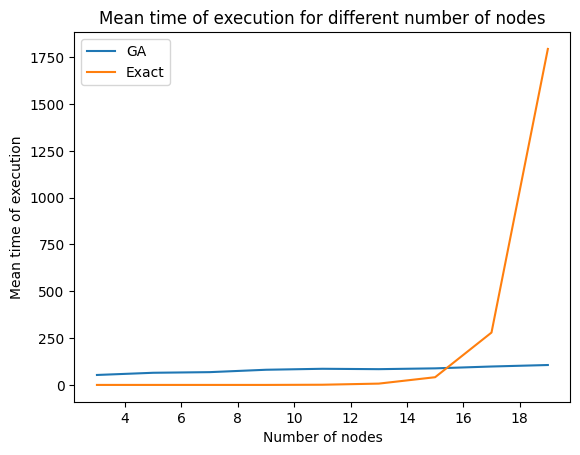

In [47]:
# calculate mean time of execution and plot it
# create a legend for plot
means = {"ga": {}, "exact": {} }

# calculate mean time of execution
for number in results:
    ga_mean = np.mean(results[number]["ga"]["time"])
    exact_mean = np.mean(results[number]["exact"]["time"])
    means["ga"][number] = ga_mean
    means["exact"][number] = exact_mean

# plit the results
plt.plot(list(means["ga"].keys()), list(means["ga"].values()), label="GA")
plt.plot(list(means["exact"].keys()), list(means["exact"].values()), label="Exact")

plt.xlabel('Number of nodes')
plt.ylabel('Mean time of execution')
plt.title('Mean time of execution for different number of nodes')
plt.legend()
plt.show()


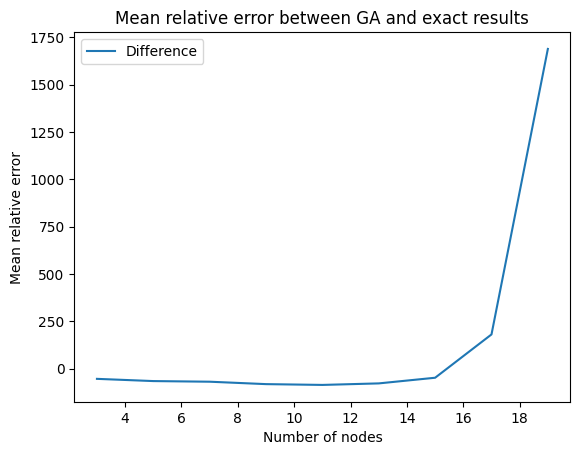

In [58]:
# plot the difference between the results

differences = {}
for number in results:
    differences[number] = np.mean(np.array(results[number]["exact"]["time"]) - np.array(results[number]["ga"]["time"]))

plt.plot(list(differences.keys()), list(differences.values()), label="Difference")
plt.xlabel('Number of nodes')
plt.ylabel('Mean relative error')
plt.title('Mean relative error between GA and exact results')
plt.legend()


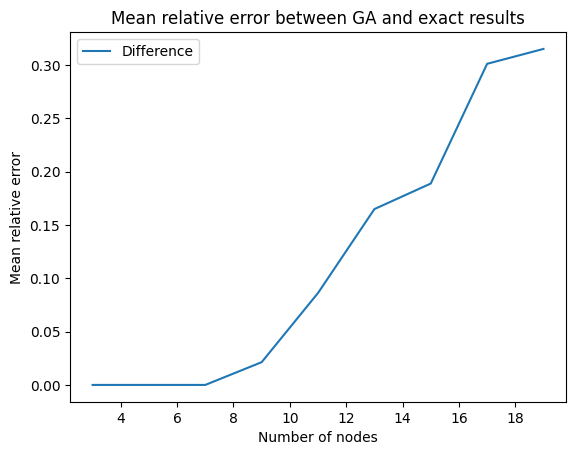

In [48]:
# plot the difference between the results

differences = {}
for number in results:
    differences[number] = np.mean(np.array(results[number]["ga"]["results"]) - np.array(results[number]["exact"]["results"])) / np.mean(results[number]["exact"]["results"])

plt.plot(list(differences.keys()), list(differences.values()), label="Difference")
plt.xlabel('Number of nodes')
plt.ylabel('Mean relative error')
plt.title('Mean relative error between GA and exact results')
plt.legend()
